E13. project_Stock_Prediction
===

이번 프로젝트로 주가를 예측하는 ARIMA Model를 학습시켜보겠습니다. 오늘 예측해볼 선수들 입장합니다. 


<br/>
<br/>

- 한국인들의 무한한 사랑을 받고 있는 :: **스타벅스(SBUX)!**

![SBUX_CAH_Logo_international_RGB-01_4](https://user-images.githubusercontent.com/70703320/109803554-867f5e00-7c64-11eb-8002-261a9c5ed010.png)

<br/>
<br/>

- 나스닥을 1배로 추종하는 미국장 상장 ETF :: **큐큐큐(QQQ)!**
![QQQ-Cartera-768x432](https://user-images.githubusercontent.com/70703320/109803697-b595cf80-7c64-11eb-988b-67fd98a9e7c3.jpg)

<br/>
<br/>

- 반도체 팹리스 회사의 일인자 :: **브로드컴(AVGO)!**

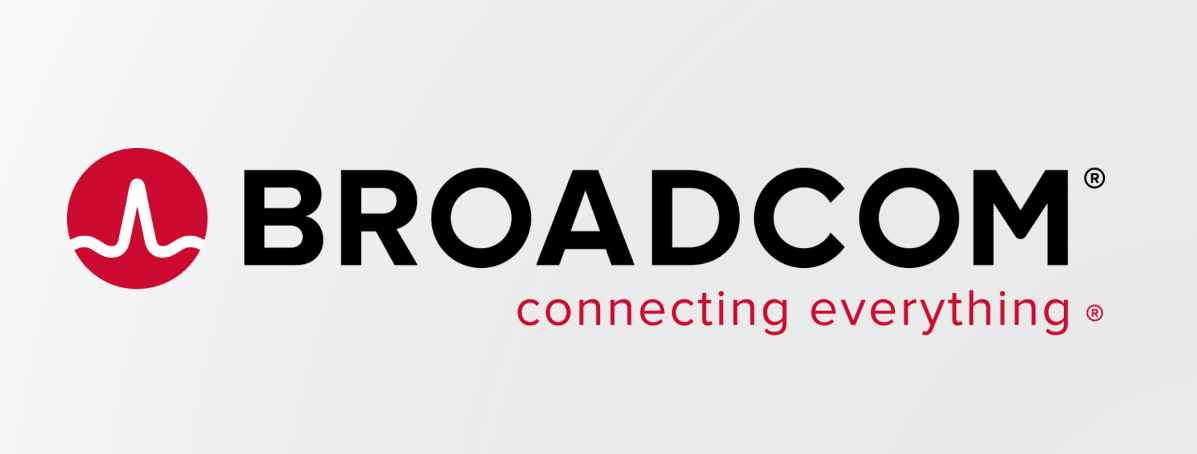

<br/>
<br/>



바로 갑니다!

<br/>

## STEP 1 : 시계열 데이터 준비

### 라이브러리 설정 및 데이터 불러온 후 Close(종가)만 사용

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Time Series 생성
dataset_filepath1 = os.getenv('HOME')+'/aiffel/stock_prediction/data/SBUX.csv'
dataset_filepath2 = os.getenv('HOME')+'/aiffel/stock_prediction/data/QQQ.csv' 
dataset_filepath3 = os.getenv('HOME')+'/aiffel/stock_prediction/data/AVGO.csv' 
df1 = pd.read_csv(dataset_filepath1, index_col='Date', parse_dates=True)
df2 = pd.read_csv(dataset_filepath2, index_col='Date', parse_dates=True) 
df3 = pd.read_csv(dataset_filepath3, index_col='Date', parse_dates=True) 
ts1 = df1['Close']
ts2 = df2['Close']
ts3 = df3['Close']
ts1.head()
ts2.head()
ts3.head()

Date
2020-03-02    284.970001
2020-03-03    274.250000
2020-03-04    285.450012
2020-03-05    274.040009
2020-03-06    269.450012
Name: Close, dtype: float64

## STEP 2 : 각종 전처리 수행


### 결측치 처리

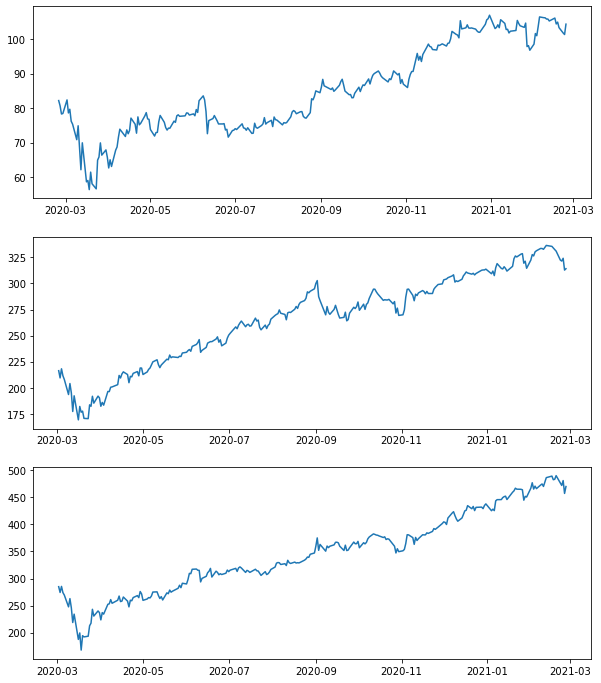

In [2]:
# 결측치 처리
plt.figure(figsize=(10, 12))

ax = plt.subplot(3,1,1)
ts1=ts1.interpolate(method='time')
ts1[ts1.isna()] 
plt.plot(ts1)

ax = plt.subplot(3,1,2)
ts2=ts2.interpolate(method='time')
ts2[ts2.isna()] 
plt.plot(ts2)

ax = plt.subplot(3,1,3)
ts3=ts3.interpolate(method='time')
ts3[ts3.isna()] 
plt.plot(ts3)


# Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

> 세 선수들 모두 3월 코로나 암흑기를 거친후 지속적인 성장을 보이고 있습니다. 우수합니다!

### 스케일을 줄여주기 위한 로그 변환

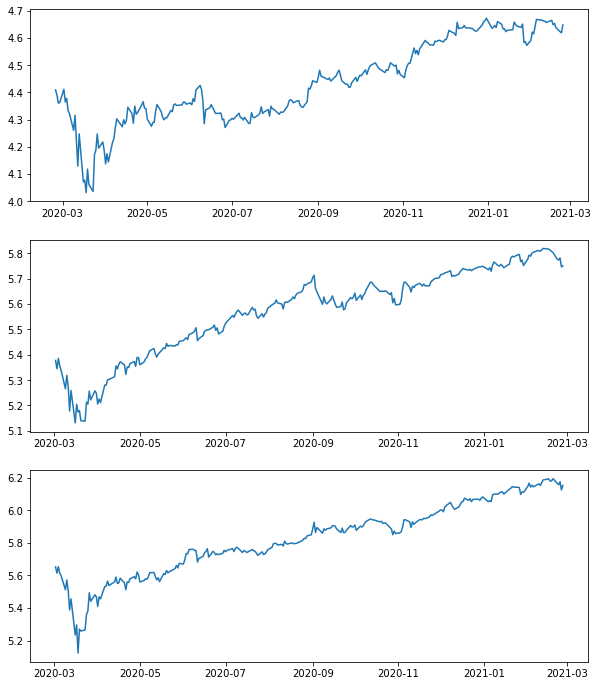

In [3]:
# 로그 변환
plt.figure(figsize=(10, 12))

ts_log1 = np.log(ts1)
ts_log2 = np.log(ts2)
ts_log3 = np.log(ts3)

ax = plt.subplot(3,1,1)
plt.plot(ts_log1)
ax = plt.subplot(3,1,2)
plt.plot(ts_log2)
ax = plt.subplot(3,1,3)
plt.plot(ts_log3)

## STEP 3 : 시계열 안정성 분석


#### 정성적 그래프 분석

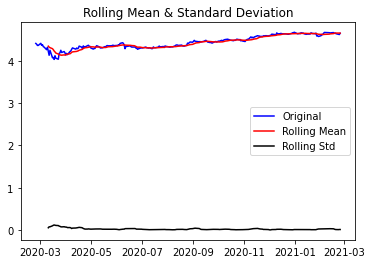

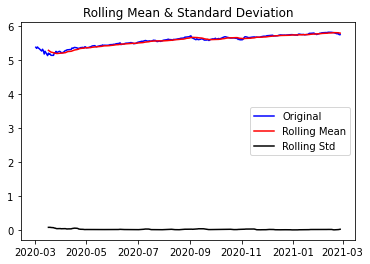

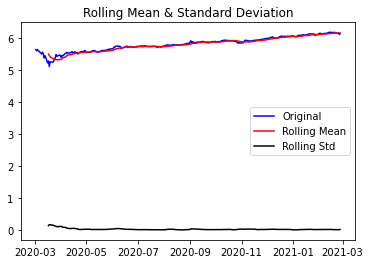

In [4]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

plot_rolling_statistics(ts_log1, window=12)
plot_rolling_statistics(ts_log2, window=12)
plot_rolling_statistics(ts_log3, window=12)

> Std(표준편차)가 작은걸로 보아 세 선수들 모두 안정적으로 보이네요. 하지만 정량적인 test를 거쳐보도록 하죠.

#### 정량적 Augmented Dicky-Fuller Test

In [5]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

print('            SBUX_analysis')
print('----------------------------------------------')
augmented_dickey_fuller_test(ts_log1)
print('----------------------------------------------')
print('            QQQ_analysis')
print('----------------------------------------------')

augmented_dickey_fuller_test(ts_log2)
print('----------------------------------------------')
print('            AVGO_analysis')
print('----------------------------------------------')

augmented_dickey_fuller_test(ts_log3)

            SBUX_analysis
----------------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                  -0.678191
p-value                          0.852318
#Lags Used                       8.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64
----------------------------------------------
            QQQ_analysis
----------------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                  -2.795091
p-value                          0.058978
#Lags Used                      10.000000
Number of Observations Used    240.000000
Critical Value (1%)             -3.457894
Critical Value (5%)             -2.873659
Critical Value (10%)            -2.573229
dtype: float64
----------------------------------------------
            AVGO_analysis
----------------------------------------------
Results 

> **Augmented Dicky-Fuller Test**에서 **귀무가설**은 `주어진 시계열 데이터가 안정적이지 않다.`인데요, `SBUX`와 `AVGO`의 **p-value는 0.8이 넘는 매우 큰 값을 가지고 있으므로 귀무가설을 기각시키기에는 매우 힘들 것 같군요.** 대단합니다. 하지만 `QQQ`의 **p-value는 0.05를 간신히 넘긴 모습**인데요. **유의수준을 0.05로 놓아 일단은 안정적이라고는 판단하겠지만 유의할 필요가 있겠습니다.** 오늘 좋지 않은 모습을 보여주네요.


### 시계열 분해(Time Series Decomposition)

#### SBUX

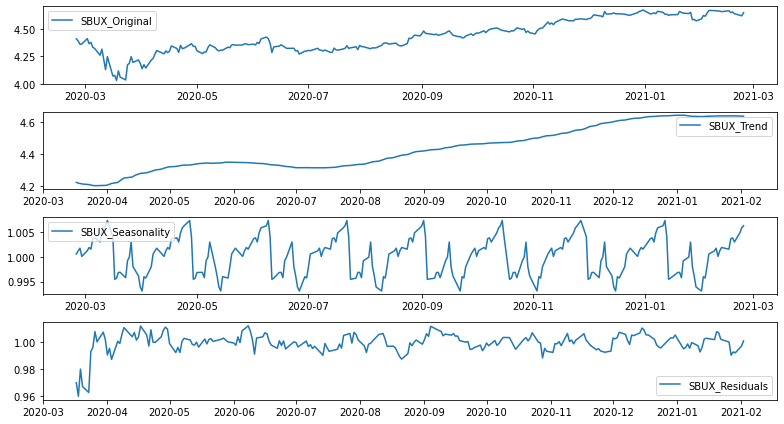

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition1 = seasonal_decompose(ts_log1, model='multiplicative', period = 30)
decomposition2 = seasonal_decompose(ts_log2, model='multiplicative', period = 30)
decomposition3 = seasonal_decompose(ts_log3, model='multiplicative', period = 30)

trend1 = decomposition1.trend
seasonal1 = decomposition1.seasonal
residual1 = decomposition1.resid

trend2 = decomposition2.trend
seasonal2 = decomposition2.seasonal
residual2 = decomposition2.resid

trend3 = decomposition3.trend
seasonal3 = decomposition3.seasonal
residual3 = decomposition3.resid


plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log1, label='SBUX_Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend1, label='SBUX_Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal1,label='SBUX_Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual1, label='SBUX_Residuals')
plt.legend(loc='best')
plt.tight_layout()


#### QQQ

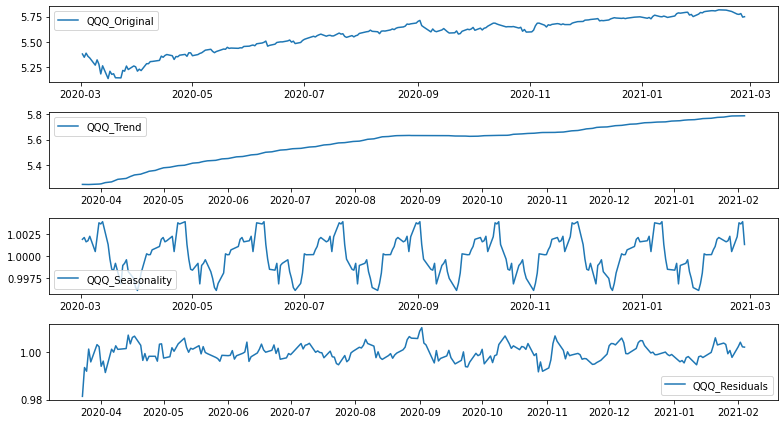

In [7]:
plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log2, label='QQQ_Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend2, label='QQQ_Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal2,label='QQQ_Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual2, label='QQQ_Residuals')
plt.legend(loc='best')
plt.tight_layout()

#### AVGO

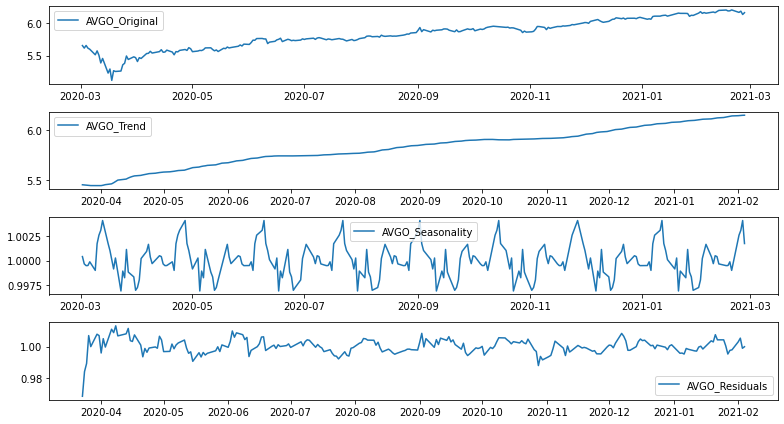

In [8]:
plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log3, label='AVGO_Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend3, label='AVGO_Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal3,label='AVGO_Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual3, label='AVGO_Residuals')
plt.legend(loc='best')
plt.tight_layout()

> 세 선수들 모두 Trend가 증가하고 있으며, seasonality도 매우 규칙적으로 보입니다.

#### Residual 안정성 확인

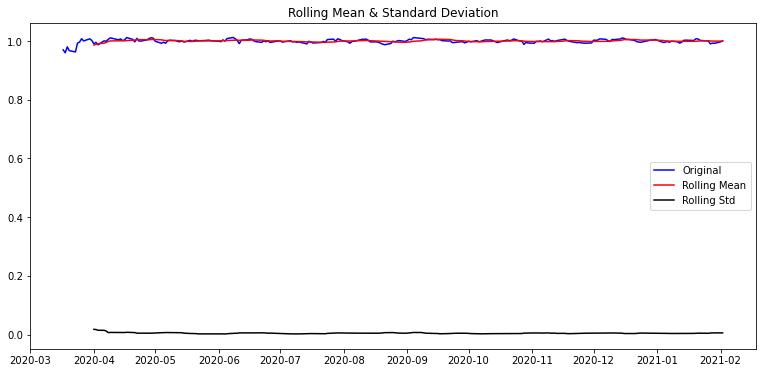

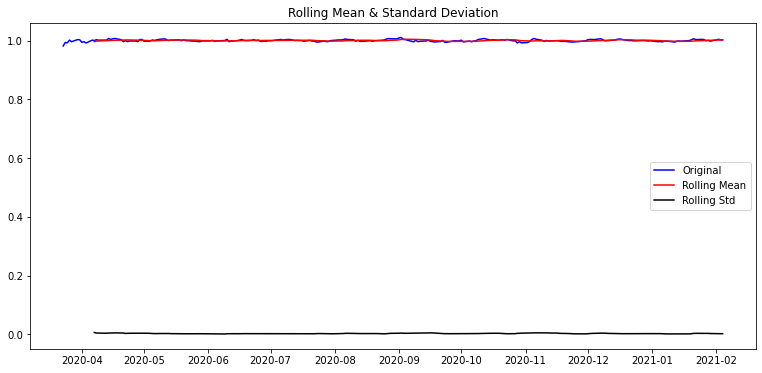

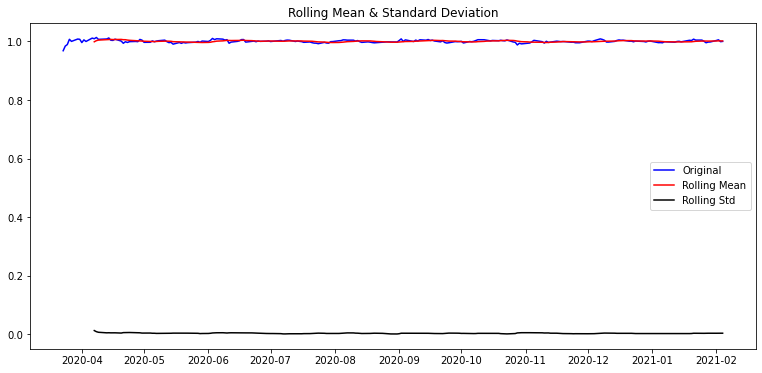

In [9]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual1)

plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual2)

plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual3)

> 아주 평화롭군요.. 세 선수 Residual만 남겨주니 모두 二 자의 모습을 보여주고 있습니다.


## STEP 4 : 학습, 테스트 데이터셋 생성

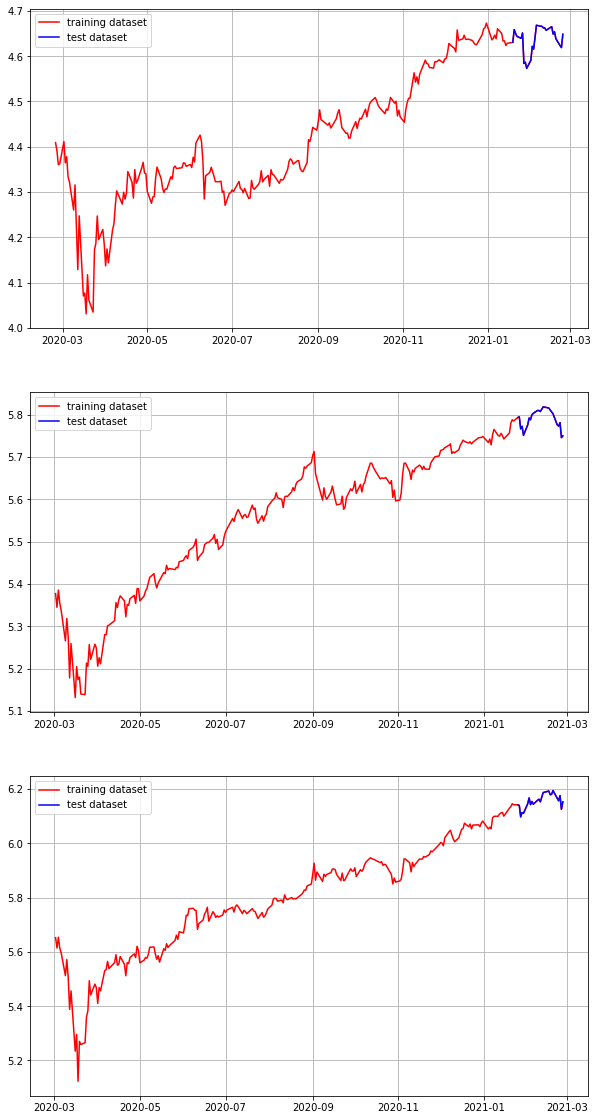

In [10]:
train_data1, test_data1 = ts_log1[:int(len(ts_log1)*0.9)], ts_log1[int(len(ts_log1)*0.9):]
train_data2, test_data2 = ts_log2[:int(len(ts_log2)*0.9)], ts_log2[int(len(ts_log1)*0.9):]
train_data3, test_data3 = ts_log3[:int(len(ts_log3)*0.9)], ts_log3[int(len(ts_log1)*0.9):]

plt.figure(figsize=(10,20))

ax = plt.subplot(3,1,1)
plt.grid(True)
plt.plot(ts_log1, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data1, c='b', label='test dataset')
plt.legend()

ax = plt.subplot(3,1,2)
plt.grid(True)
plt.plot(ts_log2, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data2, c='b', label='test dataset')
plt.legend()

ax = plt.subplot(3,1,3)
plt.grid(True)
plt.plot(ts_log3, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data3, c='b', label='test dataset')
plt.legend()

> 이번 선수들의 주가를 예측하기 위해 최근 주가를 Test dataset으로 하여 예측해보도록 합시다. 

## STEP 5 : 적정 ARIMA 모수 찾기

### ACF, PACF 그려보기 -> p,q 구하기 

#### SBUX

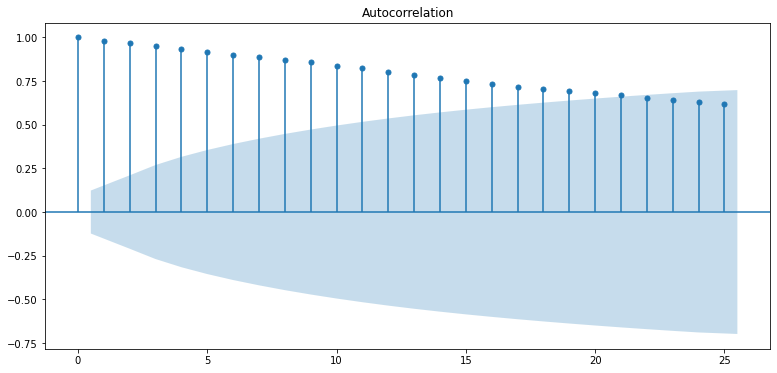

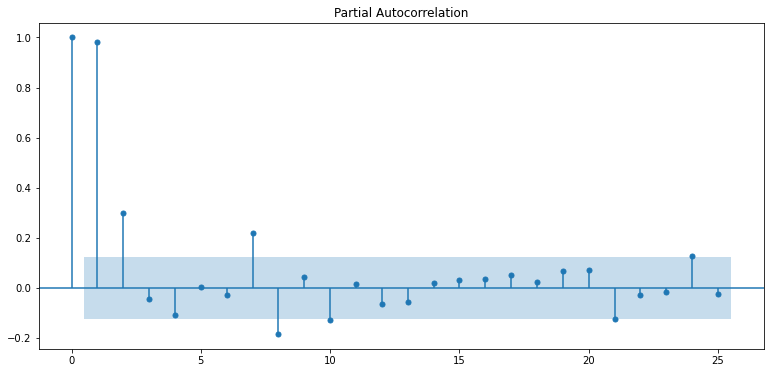

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log1)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log1)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

#### QQQ

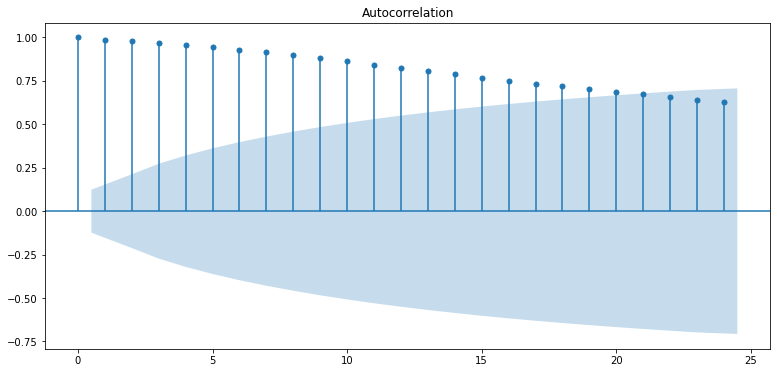

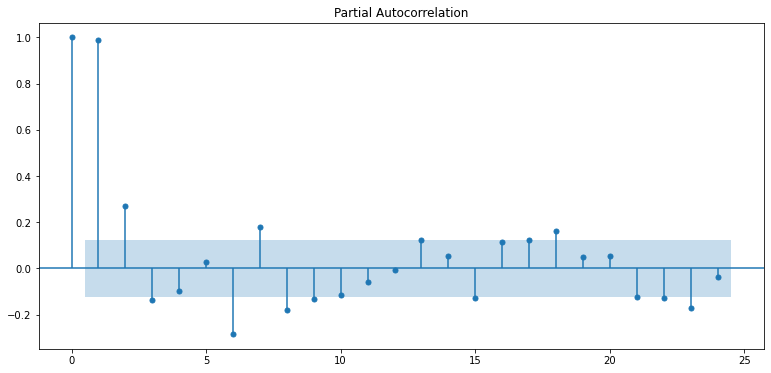

In [12]:
plot_acf(ts_log2)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log2)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

#### AVGO

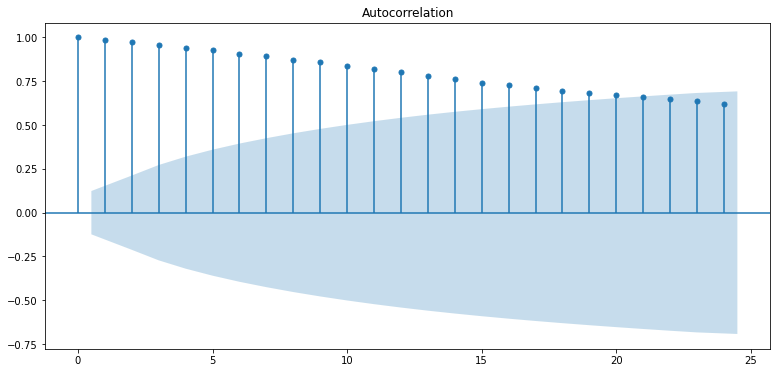

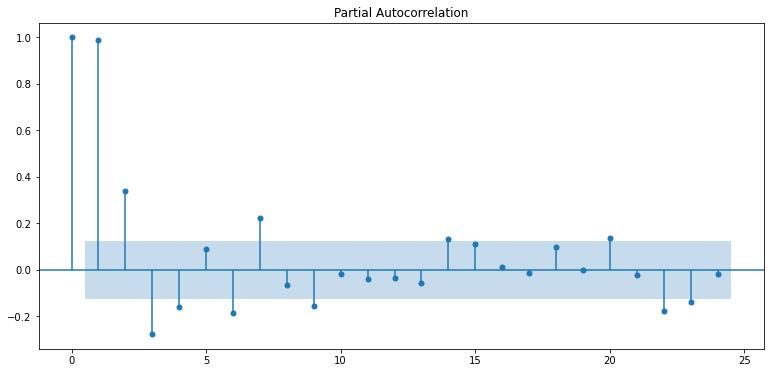

In [13]:
plot_acf(ts_log3)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log3)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

> 세 선수 모두 동일한 양상을 보여주고 있네요. 세 선수의 ACF그래프는 점차적으로 감소하고 있습니다. 또한, PACF 그래프를 살펴보면 특정 시점 이후 0으로 수렴하고 있네요. 그렇다면 **세 선수 모두 AR(p) 모형을 따른다고 봐야겠군요. (q = 0)** 

`SBUX` :: p=3 이후에 0으로 수렴하는 모습입니다. 따라서, **p=2** <br/>
`QQQ` :: p=4 이후에 0으로 수렴하는 모습입니다. 따라서, **p=3** <br/>
`AVGO` :: p=5 이후에 0으로 수렴하는 모습입니다. 따라서, **p=4** <br/>

### 차분 안정성 확인 -> d 구하기

#### SBUX, d=1

Results of Dickey-Fuller Test:
Test Statistic                -6.144204e+00
p-value                        7.838545e-08
#Lags Used                     7.000000e+00
Number of Observations Used    2.440000e+02
Critical Value (1%)           -3.457438e+00
Critical Value (5%)           -2.873459e+00
Critical Value (10%)          -2.573122e+00
dtype: float64


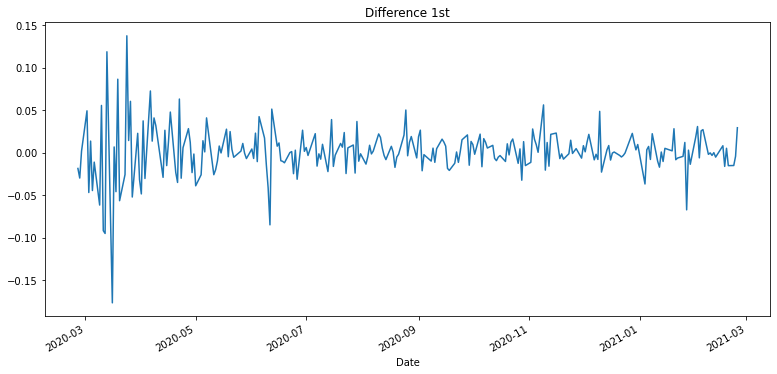

In [14]:
diff_1 = ts_log1.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

#### SBUX, d=2

Results of Dickey-Fuller Test:
Test Statistic                -8.966613e+00
p-value                        7.957561e-15
#Lags Used                     1.000000e+01
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64


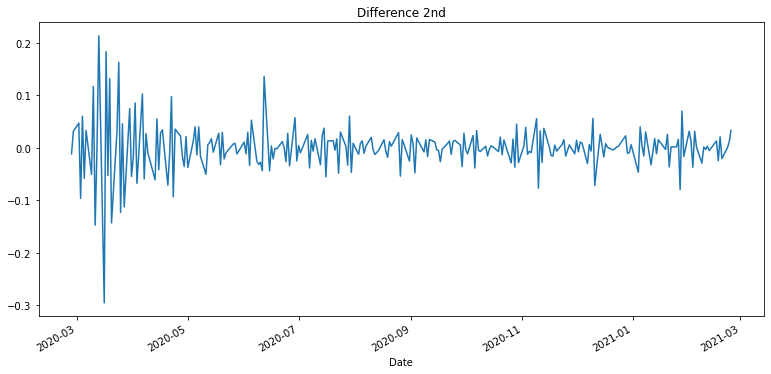

In [15]:
diff_12 = diff_1.diff(periods=1).iloc[1:]
diff_12.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_12)

#### SBUX, d=3

Results of Dickey-Fuller Test:
Test Statistic                -9.160359e+00
p-value                        2.542836e-15
#Lags Used                     1.600000e+01
Number of Observations Used    2.330000e+02
Critical Value (1%)           -3.458731e+00
Critical Value (5%)           -2.874026e+00
Critical Value (10%)          -2.573424e+00
dtype: float64


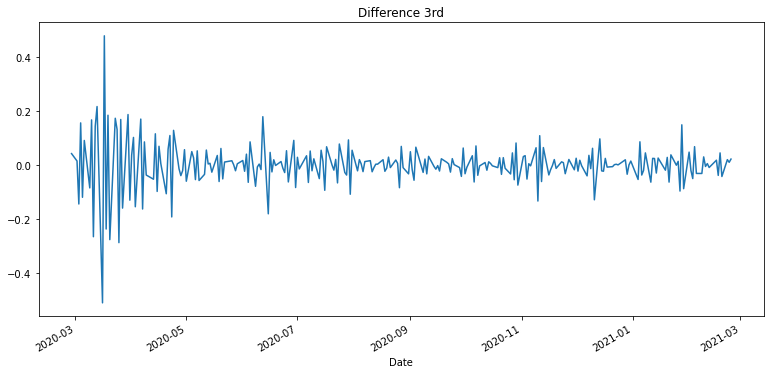

In [16]:
diff_13 = diff_12.diff(periods=1).iloc[1:]
diff_13.plot(title='Difference 3rd')

augmented_dickey_fuller_test(diff_13)

#### QQQ, d=1

Results of Dickey-Fuller Test:
Test Statistic                -6.376998e+00
p-value                        2.270857e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64


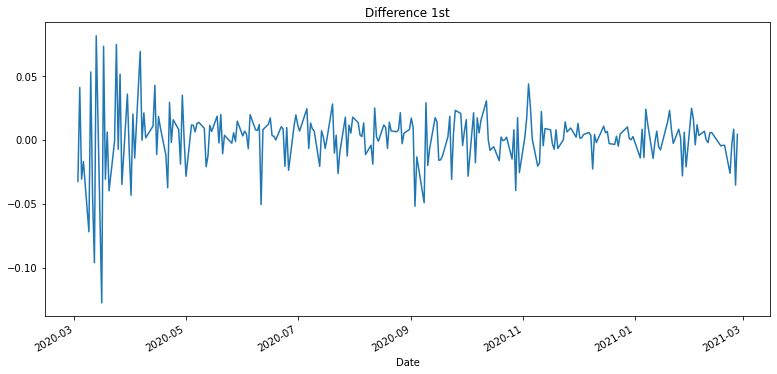

In [17]:
diff_2 = ts_log2.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_2)

#### QQQ, d=2

Results of Dickey-Fuller Test:
Test Statistic                -7.819347e+00
p-value                        6.735227e-12
#Lags Used                     1.000000e+01
Number of Observations Used    2.380000e+02
Critical Value (1%)           -3.458128e+00
Critical Value (5%)           -2.873762e+00
Critical Value (10%)          -2.573283e+00
dtype: float64


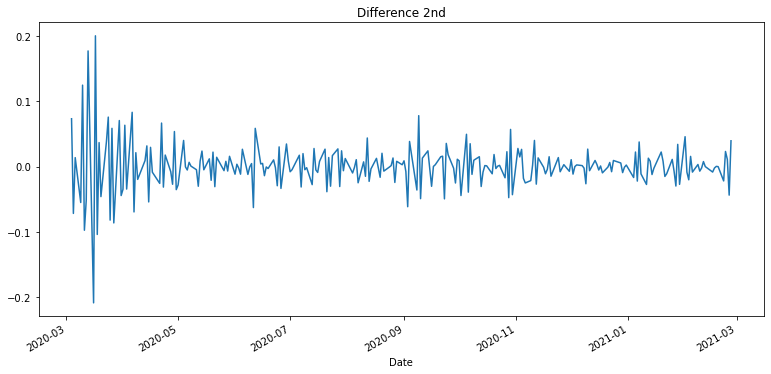

In [18]:
diff_22 = diff_2.diff(periods=1).iloc[1:]
diff_22.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_22)

### QQQ, d=3

Results of Dickey-Fuller Test:
Test Statistic                -9.981231e+00
p-value                        2.112102e-17
#Lags Used                     1.400000e+01
Number of Observations Used    2.330000e+02
Critical Value (1%)           -3.458731e+00
Critical Value (5%)           -2.874026e+00
Critical Value (10%)          -2.573424e+00
dtype: float64


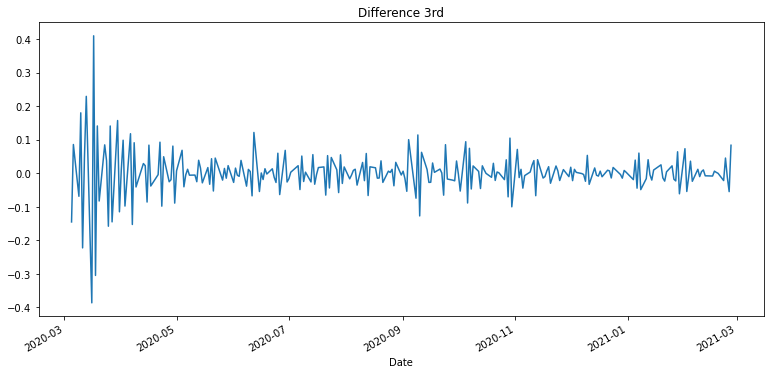

In [19]:
diff_23 = diff_22.diff(periods=1).iloc[1:]
diff_23.plot(title='Difference 3rd')

augmented_dickey_fuller_test(diff_23)

#### AVGO, d=1

Results of Dickey-Fuller Test:
Test Statistic                -5.821974e+00
p-value                        4.162586e-07
#Lags Used                     1.600000e+01
Number of Observations Used    2.330000e+02
Critical Value (1%)           -3.458731e+00
Critical Value (5%)           -2.874026e+00
Critical Value (10%)          -2.573424e+00
dtype: float64


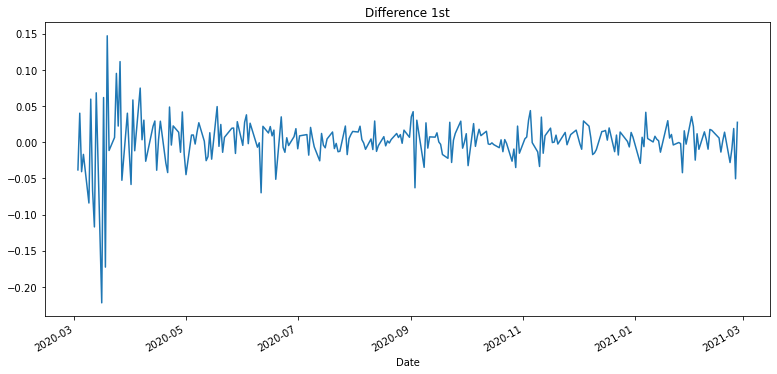

In [20]:
diff_3 = ts_log3.diff(periods=1).iloc[1:]
diff_3.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_3)

#### AVGO, d=2

Results of Dickey-Fuller Test:
Test Statistic                -9.035725e+00
p-value                        5.295987e-15
#Lags Used                     1.000000e+01
Number of Observations Used    2.380000e+02
Critical Value (1%)           -3.458128e+00
Critical Value (5%)           -2.873762e+00
Critical Value (10%)          -2.573283e+00
dtype: float64


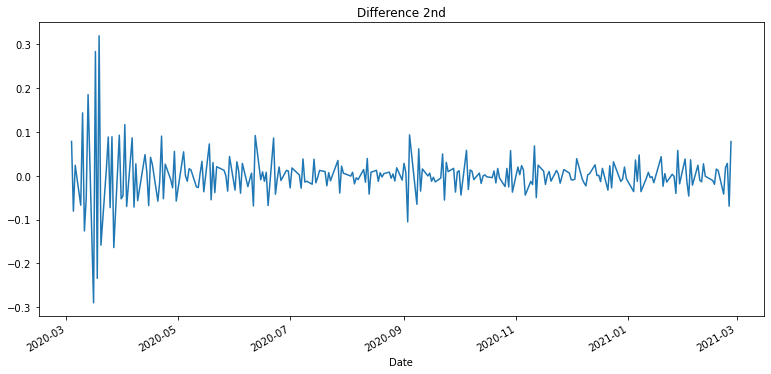

In [21]:
diff_32 = diff_3.diff(periods=1).iloc[1:]
diff_32.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_32)

#### AVGO, d=3

Results of Dickey-Fuller Test:
Test Statistic                -9.047134e+00
p-value                        4.951826e-15
#Lags Used                     1.600000e+01
Number of Observations Used    2.310000e+02
Critical Value (1%)           -3.458980e+00
Critical Value (5%)           -2.874135e+00
Critical Value (10%)          -2.573482e+00
dtype: float64


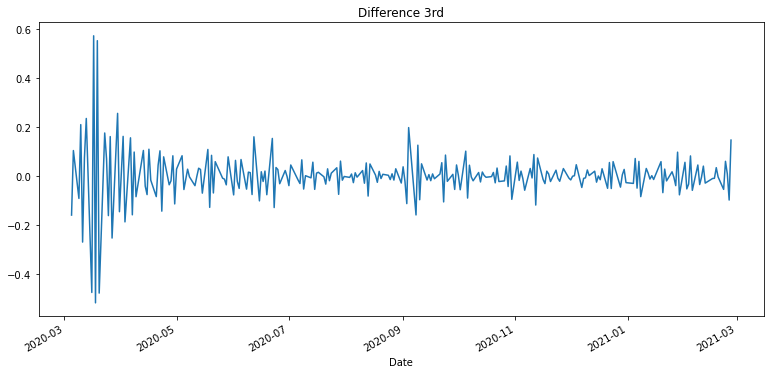

In [22]:
diff_33 = diff_32.diff(periods=1).iloc[1:]
diff_33.plot(title='Difference 3rd')

augmented_dickey_fuller_test(diff_33)

> 각 선수들의 3차 차분까지 지켜본 결과 차분을 1까지 하였을 경우로 결론을 지어보겠습니다. 


## STEP 6 : ARIMA 모델 훈련과 테스트

### ARIMA 모델 빌드와 훈련
#### SBUX => (p, d, q) = (2, 1, 0)

In [23]:
from statsmodels.tsa.arima_model import ARIMA

model1 = ARIMA(train_data1, order=(2, 1, 0))  # (p, d, q)  
fitted_m1 = model1.fit(disp=-1)  
print(fitted_m1.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  226
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 483.207
Method:                       css-mle   S.D. of innovations              0.029
Date:                Wed, 03 Mar 2021   AIC                           -958.413
Time:                        23:14:46   BIC                           -944.731
Sample:                             1   HQIC                          -952.892
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0010      0.002      0.647      0.517      -0.002       0.004
ar.L1.D.Close    -0.2877      0.066     -4.329      0.000      -0.418      -0.157
ar.L2.D.Close     0.0324      0.067     

/home/aiffel-dj63/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj63/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

#### QQQ  => (p, d, q) = (3, 1, 0)

In [24]:
model2 = ARIMA(train_data2, order=(3, 1, 0))  
fitted_m2 = model2.fit(disp=-1)  
print(fitted_m2.summary())

/home/aiffel-dj63/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj63/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  224
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 544.127
Method:                       css-mle   S.D. of innovations              0.021
Date:                Wed, 03 Mar 2021   AIC                          -1078.254
Time:                        23:14:46   BIC                          -1061.196
Sample:                             1   HQIC                         -1071.368
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0018      0.001      1.469      0.142      -0.001       0.004
ar.L1.D.Close    -0.3386      0.067     -5.070      0.000      -0.470      -0.208
ar.L2.D.Close     0.1317      0.070     

#### AVGO  => (p, d, q) = (4, 1, 0)

In [25]:
model3 = ARIMA(train_data3, order=(4, 1, 0))  
fitted_m3 = model3.fit(disp=-1)  
print(fitted_m3.summary())

/home/aiffel-dj63/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj63/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  224
Model:                 ARIMA(4, 1, 0)   Log Likelihood                 473.011
Method:                       css-mle   S.D. of innovations              0.029
Date:                Wed, 03 Mar 2021   AIC                           -934.023
Time:                        23:14:46   BIC                           -913.553
Sample:                             1   HQIC                          -925.760
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0023      0.002      1.123      0.262      -0.002       0.006
ar.L1.D.Close    -0.3134      0.066     -4.753      0.000      -0.443      -0.184
ar.L2.D.Close     0.3647      0.069     

#### 모델 테스트 및 플로팅

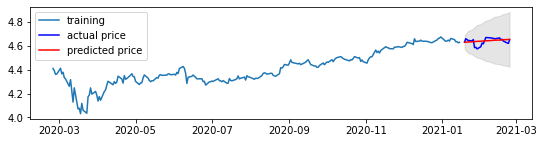

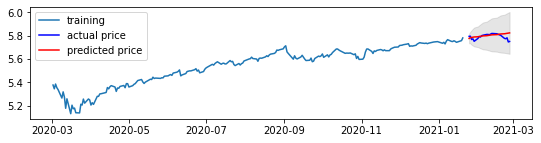

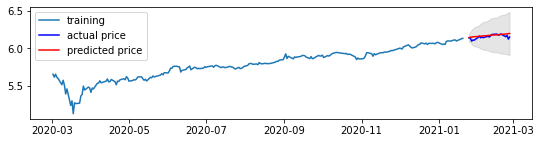

In [26]:
# Forecast : 결과가 fc에 담깁니다. 
fc1, se1, conf1 = fitted_m1.forecast(len(test_data1), alpha=0.05)  # 95% conf
fc2, se2, conf2 = fitted_m2.forecast(len(test_data2), alpha=0.05)  # 95% conf
fc3, se3, conf3 = fitted_m3.forecast(len(test_data3), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series1 = pd.Series(fc1, index=test_data1.index)   # 예측결과
lower_series1 = pd.Series(conf1[:, 0], index=test_data1.index)  # 예측결과의 하한 바운드
upper_series1 = pd.Series(conf1[:, 1], index=test_data1.index)  # 예측결과의 상한 바운드

fc_series2 = pd.Series(fc2, index=test_data2.index)   # 예측결과
lower_series2 = pd.Series(conf2[:, 0], index=test_data2.index)  # 예측결과의 하한 바운드
upper_series2 = pd.Series(conf2[:, 1], index=test_data2.index)  # 예측결과의 상한 바운드

fc_series3 = pd.Series(fc3, index=test_data3.index)   # 예측결과
lower_series3 = pd.Series(conf3[:, 0], index=test_data3.index)  # 예측결과의 하한 바운드
upper_series3 = pd.Series(conf3[:, 1], index=test_data3.index)  # 예측결과의 상한 바운드


# Plot
plt.figure(figsize=(9,7))
ax = plt.subplot(3,1,1)
plt.plot(train_data1, label='training')
plt.plot(test_data1, c='b', label='actual price')
plt.plot(fc_series1, c='r',label='predicted price')
plt.fill_between(lower_series1.index, lower_series1, upper_series1, color='k', alpha=.10)
plt.legend()
plt.show()

plt.figure(figsize=(9,7))
ax = plt.subplot(3,1,2)
plt.plot(train_data2, label='training')
plt.plot(test_data2, c='b', label='actual price')
plt.plot(fc_series2, c='r',label='predicted price')
plt.fill_between(lower_series2.index, lower_series2, upper_series2, color='k', alpha=.10)
plt.legend()
plt.show()

plt.figure(figsize=(9,7))
ax = plt.subplot(3,1,3)
plt.plot(train_data3, label='training')
plt.plot(test_data3, c='b', label='actual price')
plt.plot(fc_series3, c='r',label='predicted price')
plt.fill_between(lower_series3.index, lower_series3, upper_series3, color='k', alpha=.10)
plt.legend()
plt.show()

## 실제 주가 예측!!

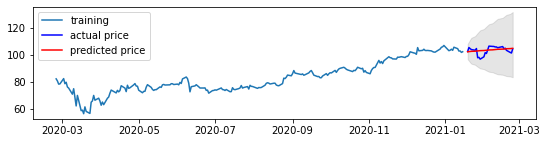

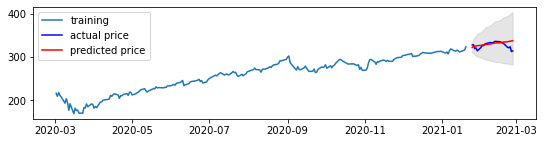

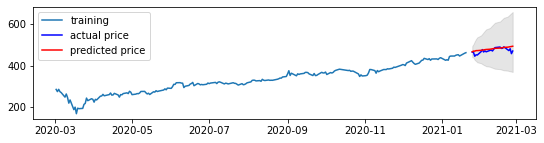

In [27]:
plt.figure(figsize=(9,7))
ax = plt.subplot(3,1,1)
plt.plot(np.exp(train_data1), label='training')
plt.plot(np.exp(test_data1), c='b', label='actual price')
plt.plot(np.exp(fc_series1), c='r',label='predicted price')
plt.fill_between(np.exp(lower_series1).index, np.exp(lower_series1), np.exp(upper_series1), color='k', alpha=.10)
plt.legend()
plt.show()

plt.figure(figsize=(9,7))
ax = plt.subplot(3,1,2)
plt.plot(np.exp(train_data2), label='training')
plt.plot(np.exp(test_data2), c='b', label='actual price')
plt.plot(np.exp(fc_series2), c='r',label='predicted price')
plt.fill_between(np.exp(lower_series2).index, np.exp(lower_series2), np.exp(upper_series2), color='k', alpha=.10)
plt.legend()
plt.show()

plt.figure(figsize=(9,7))
ax = plt.subplot(3,1,3)
plt.plot(np.exp(train_data3), label='training')
plt.plot(np.exp(test_data3), c='b', label='actual price')
plt.plot(np.exp(fc_series3), c='r',label='predicted price')
plt.fill_between(np.exp(lower_series3).index, np.exp(lower_series3), np.exp(upper_series3), color='k', alpha=.10)
plt.legend()
plt.show()

> `SBUX` 오늘 아주 좋습니다. 예측선을 위 아래로 오가며 예측한 만큼의 성과를 보여주고 있습니다. 아주 훌륭합니다. <br/> `QQQ` 오늘 안좋은 모습을 연이어 보이고 있네요. 예측선에 오긴하지만 계속 하향세를 보여주고 있네요. 미국 경기가 최근 불황인가요? <br/> `AVGO`는 나쁘지 않은 모습입니다. 예측보다는 조금 성과를 못내고 있지만 예측에서 크게 벗어나지 않는 모습입니다.

#### 최종 예측 모델 정확도 측정(MAPE)

최종적인 모델의 오차율을 계산하기 위해 np.exp()를 통해 원본스케일로 돌려준 후 MSE, MAE, RMSE, MAPE등을 계산해야 합니다.

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


print('            SBUX_analysis')
print('----------------------------------------------')

mse1 = mean_squared_error(np.exp(test_data1), np.exp(fc1))
print('SUBX_MSE: ', mse1)

mae1 = mean_absolute_error(np.exp(test_data1), np.exp(fc1))
print('SBUX_MAE: ', mae1)

rmse1 = math.sqrt(mean_squared_error(np.exp(test_data1), np.exp(fc1)))
print('SBUX_RMSE: ', rmse1)

mape1 = np.mean(np.abs(np.exp(fc1) - np.exp(test_data1))/np.abs(np.exp(test_data1)))
print('SBUX_MAPE: {:.2f}%'.format(mape1*100))


print('----------------------------------------------')
print('            QQQ_analysis')
print('----------------------------------------------')

mse2 = mean_squared_error(np.exp(test_data2), np.exp(fc2))
print('QQQ_MSE: ', mse2)

mae2 = mean_absolute_error(np.exp(test_data2), np.exp(fc2))
print('QQQ_MAE: ', mae2)

rmse2 = math.sqrt(mean_squared_error(np.exp(test_data2), np.exp(fc2)))
print('QQQ_RMSE: ', rmse2)

mape2 = np.mean(np.abs(np.exp(fc2) - np.exp(test_data2))/np.abs(np.exp(test_data2)))
print('QQQ_MAPE: {:.2f}%'.format(mape2*100))


print('----------------------------------------------')
print('            AVGO_analysis')
print('----------------------------------------------')

mse3 = mean_squared_error(np.exp(test_data3), np.exp(fc3))
print('AVGO_MSE: ', mse3)

mae3 = mean_absolute_error(np.exp(test_data3), np.exp(fc3))
print('AVGO_MAE: ', mae3)

rmse3 = math.sqrt(mean_squared_error(np.exp(test_data3), np.exp(fc3)))
print('AVGO_RMSE: ', rmse3)

mape3 = np.mean(np.abs(np.exp(fc3) - np.exp(test_data3))/np.abs(np.exp(test_data3)))
print('AVGO_MAPE: {:.2f}%'.format(mape3*100))

            SBUX_analysis
----------------------------------------------
SUBX_MSE:  7.389160556888685
SBUX_MAE:  2.2087312359681386
SBUX_RMSE:  2.7183010423587533
SBUX_MAPE: 2.17%
----------------------------------------------
            QQQ_analysis
----------------------------------------------
QQQ_MSE:  85.8938273922195
QQQ_MAE:  6.379636279686072
QQQ_RMSE:  9.26789228423699
QQQ_MAPE: 1.99%
----------------------------------------------
            AVGO_analysis
----------------------------------------------
AVGO_MSE:  180.279042572948
AVGO_MAE:  10.324638835758583
AVGO_RMSE:  13.426803140470481
AVGO_MAPE: 2.23%


MAPE는 오차가 예측값에서 차지하는 정도를 나타내는 지표입니다. 즉, 낮을수록 신뢰성이 높다고 볼 수 있습니다. 모두 다 낮게 나왔다. 이번 선수들 아주 훌륭한 것을 판정하겠습니다. 짝짝짝!

## 회고

- 3가지 종목 정하기
    - 미국주식에 관심을 가지고 있기 때문에 선정하기 어렵지 않았다. 
    
- 시계열 분석을 통해 예측한 값의 신뢰성
    - 차트나 추세를 보면서 주식을 예측하는 것을 매우 부정적으로만 생각했었는데 의외로 높은 신뢰성을 보이고 있어서 놀라웠다. 그치만 나는 기업 가치를 보고 투자...



## 루브릭

플로팅과 adfuller 메소드가 모두 적절히 사용되었음

- 플로팅은 STEP 6에서 모델테스트 및 플로팅에서, adfuller는 STEP 5에서 정량적 Augmented Dicky-Fuller Test를 진행하였음

p,q를 위한 ACF, PACF 사용과 d를 위한 차분 과정이 명확히 제시됨

- STEP 5에서 p, q, d를 구하기 위한 과정이 상세 설명되어 있다.

3개 이상 종목이 MAPE 10% 미만의 정확도로 예측됨
- SBUX, QQQ, AVGO 세 종목에서 MAPE가 10% 이하를 보였다.